In [1]:
import torch
torch.__version__

'2.0.0+cu118'

In [2]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

print(x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


In [3]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [4]:
z = y * y * 3
out = z.mean()

In [5]:
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [6]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()

print(out)

y.retain_grad()
out.backward(retain_graph=True)

print(x.grad)
print(y.grad)
print(z.grad)
print(z.is_leaf)

out.backward()
print(x.grad)
print(y.grad)

tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
None
False
tensor([[9., 9.],
        [9., 9.]])
tensor([[9., 9.],
        [9., 9.]])


<ipython-input-6-1f70e90c9618>:13: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(z.grad)


In [7]:
import pandas as pd

from sklearn.datasets import load_iris

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [8]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.layer0 = nn.Linear(4, 128)
    self.layer1 = nn.Linear(128, 64)
    self.layer2 = nn.Linear(64, 32)
    self.layer3 = nn.Linear(32, 16)
    self.layer4 = nn.Linear(16, 3)

    self.bn0 = nn.BatchNorm1d(128)
    self.bn1 = nn.BatchNorm1d(64)
    self.bn2 = nn.BatchNorm1d(32)

    self.act = nn.ReLU()

  
  def forward(self, x):
    x = self.act(self.bn0(self.layer0(x)))
    x = self.act(self.bn1(self.layer1(x)))
    x = self.act(self.bn2(self.layer2(x)))
    x = self.act(self.layer3(x))
    x = self.layer4(x)

    return x

In [9]:
criterion = nn.CrossEntropyLoss()

ex_X, ex_y = torch.randn([4, 4]), torch.tensor([1, 0, 2, 0])

In [10]:
net = Net()
output = net(ex_X)
loss = criterion(output, ex_y)
print(loss)

tensor(1.0338, grad_fn=<NllLossBackward0>)


In [11]:
print(loss.item())

1.0338054895401


In [12]:
net.zero_grad()

In [13]:
print(net.layer4.bias.grad)
print(net.layer4.bias.is_leaf)

None
True


In [14]:
loss.backward()

In [15]:
print(net.layer4.bias.grad)

tensor([-0.1694,  0.1206,  0.0489])


In [16]:
params = list(net.parameters())

In [17]:
len(params)

16

In [18]:
params[0].size()

torch.Size([128, 4])

In [19]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.001)

optimizer.zero_grad()
output = net(ex_X)
loss = criterion(output, ex_y)
loss.backward()
optimizer.step()

In [20]:
dataset = load_iris()

type(dataset)

sklearn.utils._bunch.Bunch

In [21]:
data = dataset.data
label = dataset.target

print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
print(f'shape of data: {data.shape}')
print(f'shape of label: {label.shape}')

shape of data: (150, 4)
shape of label: (150,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, stratify=label)
print(len(X_train))
print(len(X_test))

112
38


In [24]:
# DataLoader 생성
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

train_set = TensorDataset(X_train, y_train)

train_loader = DataLoader(train_set, batch_size=4, shuffle=True)

In [25]:
net = Net()

In [26]:
print(net)

Net(
  (layer0): Linear(in_features=4, out_features=128, bias=True)
  (layer1): Linear(in_features=128, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=3, bias=True)
  (bn0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act): ReLU()
)


In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [28]:
device

'cuda'

In [29]:
net.to(device)

Net(
  (layer0): Linear(in_features=4, out_features=128, bias=True)
  (layer1): Linear(in_features=128, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=3, bias=True)
  (bn0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act): ReLU()
)

In [30]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 200

In [31]:
# Train
losses = list()
accuracies = list()

for epoch in range(200):
  epoch_loss, epoch_accuracy = 0, 0
  for X, y in train_loader:
    X = X.to(device)
    y = y.to(device)

    optimizer.zero_grad()
    output = net(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(output, dim=1)
    accuracy = (predicted == y).sum().item()
    epoch_loss += loss.item()
    epoch_accuracy += accuracy
  
  epoch_loss /= len(train_loader)
  epoch_accuracy /= len(X_train)
  print("epoch: {}, \tloss: {}, \taccuracy: {}".format(str(epoch+1).zfill(3), round(epoch_loss, 4), round(epoch_accuracy,4)))

  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

epoch: 001, 	loss: 1.1014, 	accuracy: 0.3839
epoch: 002, 	loss: 1.0914, 	accuracy: 0.375
epoch: 003, 	loss: 1.0714, 	accuracy: 0.4554
epoch: 004, 	loss: 1.0532, 	accuracy: 0.5089
epoch: 005, 	loss: 1.0341, 	accuracy: 0.6161
epoch: 006, 	loss: 1.0229, 	accuracy: 0.6161
epoch: 007, 	loss: 1.03, 	accuracy: 0.5536
epoch: 008, 	loss: 1.0159, 	accuracy: 0.6071
epoch: 009, 	loss: 0.9981, 	accuracy: 0.5536
epoch: 010, 	loss: 0.9958, 	accuracy: 0.5804
epoch: 011, 	loss: 0.9886, 	accuracy: 0.5804
epoch: 012, 	loss: 0.9926, 	accuracy: 0.5893
epoch: 013, 	loss: 0.9925, 	accuracy: 0.6339
epoch: 014, 	loss: 0.9944, 	accuracy: 0.6071
epoch: 015, 	loss: 0.9638, 	accuracy: 0.625
epoch: 016, 	loss: 0.9409, 	accuracy: 0.6429
epoch: 017, 	loss: 0.9317, 	accuracy: 0.6518
epoch: 018, 	loss: 0.9214, 	accuracy: 0.6339
epoch: 019, 	loss: 0.9149, 	accuracy: 0.6518
epoch: 020, 	loss: 0.8818, 	accuracy: 0.6696
epoch: 021, 	loss: 0.9256, 	accuracy: 0.6161
epoch: 022, 	loss: 0.9121, 	accuracy: 0.6518
epoch: 023, 	l

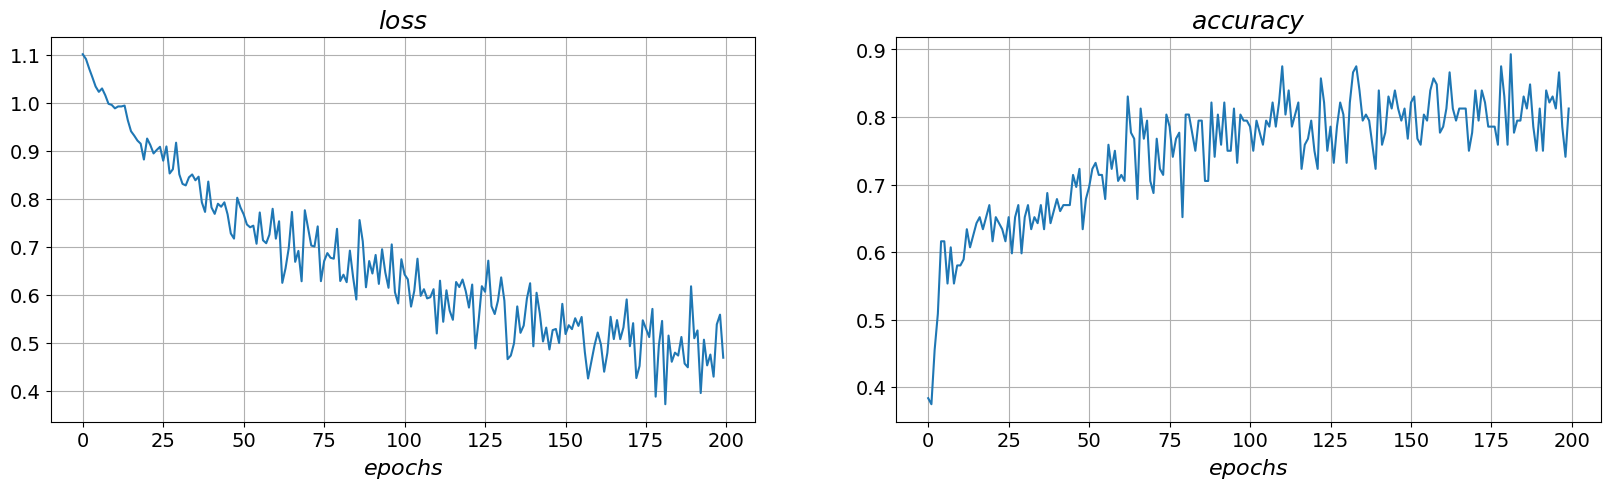

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1, 2, 1)
plt.title('$loss$', fontsize=18)
plt.plot(losses)
plt.grid()
plt.xlabel('$epochs$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1, 2, 2)
plt.title('$accuracy$', fontsize=18)
plt.plot(accuracies)
plt.grid()
plt.xlabel('$epochs$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [33]:
# Test
X_test = X_test.to(device)
y_test = y_test.to(device)
output = net(X_test)
print(torch.max(output, dim=1))
_, predicted = torch.max(output, dim=1)
accuracy = round((predicted == y_test).sum().item() / len(y_test), 4)

print(f'test_set accuracy : {round(accuracy, 4)}')

torch.return_types.max(
values=tensor([2.3600, 0.9951, 1.3199, 1.2082, 0.7657, 1.3701, 0.9096, 0.9951, 1.2465,
        2.3857, 2.0668, 1.0373, 1.5889, 1.4076, 1.2741, 1.0093, 2.0393, 1.1491,
        1.2641, 1.0051, 0.6571, 1.4101, 2.0484, 0.9712, 2.3394, 1.2428, 3.1322,
        2.1091, 1.3051, 1.4055, 1.3781, 1.9677, 1.5115, 1.4544, 1.2404, 1.4305,
        2.2228, 0.9179], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1,
        0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1], device='cuda:0'))
test_set accuracy : 0.9737


---

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.12.0'

In [36]:
x = tf.ones([2, 2])

In [37]:
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [38]:
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
model = keras.Sequential(
    [
        layers.Dense(2, activation='relu', name='layer1'),
        layers.Dense(3, activation='relu', name='layer2'),
        layers.Dense(4, name='layer3')
    ]
)

x = tf.ones((3, 3))
y=  model(x)
print(y)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)


In [40]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [42]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [44]:
len(class_names)

10

In [45]:
train_images.shape

(60000, 28, 28)

In [46]:
len(train_labels)

60000

In [50]:
from collections import Counter

label_dict = Counter(train_labels)

In [51]:
label_dict

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

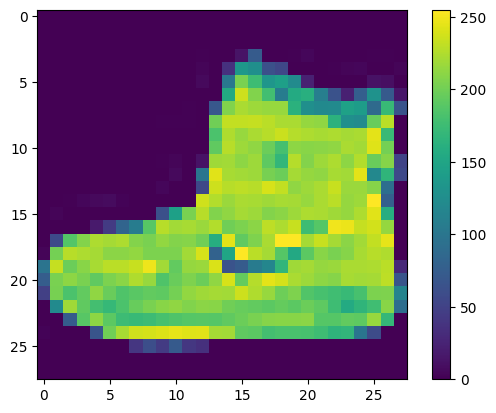

In [52]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [53]:
train_images = train_images / 255.0

test_images = test_images / 255.0

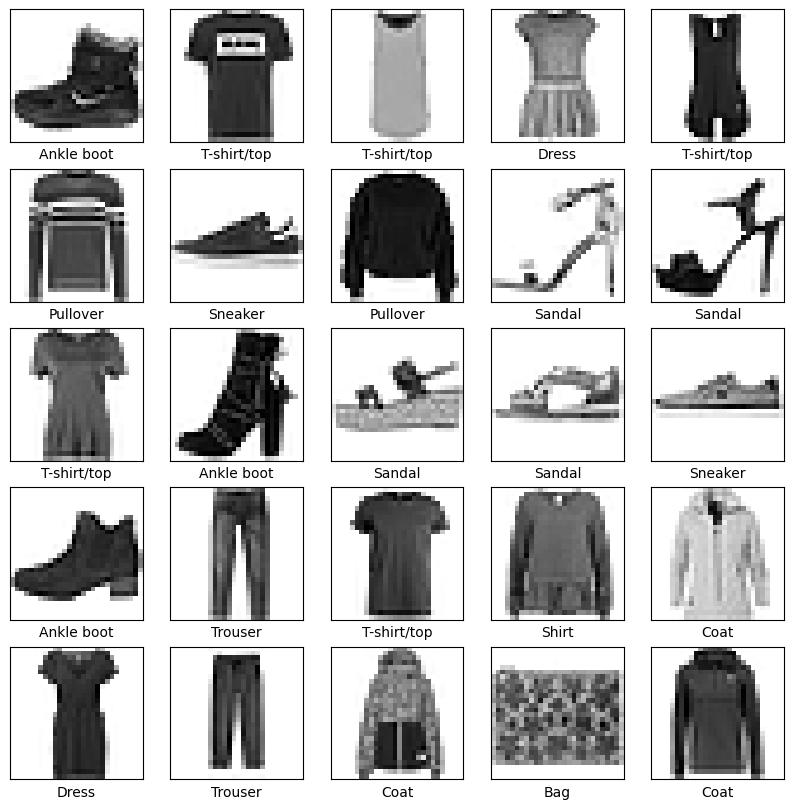

In [54]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


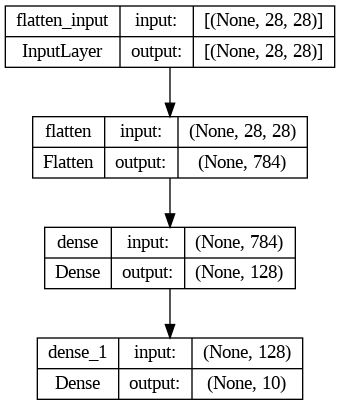

In [57]:
keras.utils.plot_model(model, show_shapes=True)

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4988 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.8912


In [60]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Test Loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 - 1s - loss: 0.3595 - accuracy: 0.8731 - 606ms/epoch - 2ms/step
Test Loss: 0.35945069789886475
Test accuracy: 0.8730999827384949
